# **Exploratory Data Analysis on Flipkart Dataset**


![](https://images.unsplash.com/photo-1654573817889-296cad084c97?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8RmxpcGthcnR8ZW58MHx8MHx8&auto=format&fit=crop&w=1000&q=70)

## **Introduction**
" The Matrix is everywhere. It is all around us. Even now in this very room. You can see it when you look out of your window, or when you turn on your television. You can feel it when you go to work...." - Morpheus, The Matrix 1999

Fast forward to 2023, we are deeply enmeshed in the virtual world for social lives, shopping online, working or learning remotely.

It is critical for businesses of any type and size to have an online presence. Retail e-commerce sales which refers to sales from B2C worldwide was 4.28 trillion US dollars in 2020. Over 2 billion people purchased goods or services online during the same year.ref

Analysing customer behaviour helps businesses to increase customer value and therefore spend by content personalisation and optimisation.
Based on this analysis, a profile of the customer is created, they are grouped into segments by their digital footprint , interests and behaviour.

Exploratory analysis and predictive analysis techniques help businesses to structure and recalibrate their pricing, marketing, inventory stragies and more in real-time.

Flipkart Private Limited is an Indian e-commerce businesses generate voluminous amounts of data. In this notebook we will perform the exploratory data analysis for a multicategory store using Python, Pandas, Plotly, Matplotlib and Seaborn.

Identify a dataset for analysis
Explore techniques to work with large data sets
Pre-process or prepare the data for analysis
Transform the data into various summary views
We will use our framework to ask and answer interesting questions, create visualisations for the following areas of interest:

Pattern of visits by day , day of week
View and purchase patterns for products and categories
Popular brands and their contribution to monthly sales
Segment customers using RFM

**`CAUTION`**: I recommed opening and running this notebook on Google Colab for two reasons

Large dataset: 4.58 GB, binder runs into issues
Ease of navigation with Colab table of contents: This is a long notebook. I tried to pack in a lot of information as I faced several challenges as a newbie to e-commerce datasets and python EDA on large datasets.

### **About the data**

In this analysis we will use the Flipkart Private Limited is an Indian e-commerce Company on [Kaggle](https://www.kaggle.com/datasets/iyumrahul/flipkartsalesdataset) .

The Kaggle dataset has two `.csv` files
- Sales.csv 4.57 GB and 47.6 million records
- products.csv 5.38 MB and 32.2k records

**We will build the framework with and perform the analysis on the `Sales.csv`.** 

 `Sales.csv` file has the following structure of 7 columns

1. `date_`: Date when the products are sold
2. `city_name`: Place where order was punched by customers
3. `order_id`: A code for each order placed
4. `cart_id`: A numerical code that is assigned to your shopping cart
5. `dim_customer_key`: The Customer dimension breaks sales figures down by the customer hierarchy into single customers.
6. `total_discount_amount`: A deduction from the usual cost of selling price.
7. `procured_quantity`:  Encompasses a range of products ordered.
8. `unit_selling_price`: The unit selling price is the amount a company charges for a single item of a product or use of a service.
9. `total_weighted_landing_price`: Landed cost represents the total cost of a product on its journey from the factory floor to your buyer’s door.

`products.csv` file has the following structure of 9 columns

1. `product_id`: A numerical code that is assigned to products
2. `product_name`: Attribute to indicate the parent product for a variant group.
3. `unit`: Unit economics measure how much your products cost you, how much you mark them up and your gross profit.
4. `product_type`: Attribute to include your own product categorization system in your product data.
5. `brand_name`: Name that you use to identify the family of products or services that you offer or a single line of products or services that you offer.
6. `manufacturer_name`:  the name of the manufacturer as notified to the Commission by the manufacturer concerned or, where no such notification has taken place, the name registered by the registration authority of the Member State.
7. `l0_category`: Product categorisation helps customers intuitively find what they want on your e-commerce site.
8. `l1_category`: Product categorisation helps customers intuitively find what they want on your e-commerce site
9. `l2_category`:  Product categorisation helps customers intuitively find what they want on your e-commerce site

###**`Steps involved:`**


1. Install the required libraries.
2. Load the Data(Select required column, downcasting the dtypes, working with sample of data )
3. Find the Null values
4. Replace the Null values
5. Duplicate values
6. Unique values in the data
7. Filter the Data
8. Correlation Plot - EDA
9. Perform aggregation, grouping over the data
10. Plot the graph using plotly, matplotlib, seaborn


## **Install packages and import libraries**

In [ ]:
!pip install opendatasets -q
!pip install folium -q

In [ ]:
# User interact with the native OS Python is currently running on
import os

# Import python data analysis libraries
import pandas as pd
import numpy as np

# Import library to download data from Kaggle
import opendatasets as od

# Import visualisation libraries
import folium
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import plotly.express as px
from pylab import rcParams

# Set plot parameters for the notebook
%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.facecolor'] = '#00000000'

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

## **Working with large datasets**

### **Data download**

In [ ]:
#Kaggle url for the dataset
dataset_url='https://www.kaggle.com/datasets/iyumrahul/flipkartsalesdataset'
od.download(dataset_url)

Skipping, found downloaded files in "./flipkartsalesdataset" (use force=True to force download)


In [ ]:
!ls -lh ./flipkartsalesdataset

total 4.3G
-rw-r--r-- 1 root root 5.2M Feb 10 10:34 products.csv
-rw-r--r-- 1 root root 4.3G Feb 10 10:34 Sales.csv


The data has been downloaded and unzipped to the folder ``flipkartsalesdataset` Let us now check the size of the folder. There are two files in this folder. 
1. products.csv 5.2 MB
2. Sales.csv 4.3 GB

### **Picking a sample**
Explore faster loading and lesser memory by downcasting the dtype and loading required columns

In [ ]:
%%time
selected_cols = ['date_', 'city_name','order_id','procured_quantity','unit_selling_price', 'total_discount_amount', 'product_id','total_weighted_landing_price']

selected_dtypes = {
    'order_id': 'int32',
    'procured_quantity': 'int8',
    'unit_selling_price': 'float16',
    'total_discount_amount': 'float16',
    'product_id': 'int32',
    'total_weighted_landing_price': 'float32'  }

sales_df =pd.read_csv('/content/flipkartsalesdataset/Sales.csv', usecols=selected_cols, dtype=selected_dtypes, parse_dates=['date_'])

CPU times: user 1min 13s, sys: 15.2 s, total: 1min 28s
Wall time: 2min 29s


In [ ]:
%%time
select_cols =['product_id', 'product_name', 'unit', 'product_type','brand_name', 'manufacturer_name', 'l0_category', 'l1_category',
                                'l2_category', 'l0_category_id', 'l1_category_id', 'l2_category_id']
select_dtypes = {
    'product_id':'int32',
    'l0_category_id': 'int16',
    'l1_category_id':'int16',
    'l2_category_id':'int16'
}
dim_products_df=pd.read_csv('/content/flipkartsalesdataset/products.csv',usecols=select_cols, dtype=select_dtypes)

CPU times: user 101 ms, sys: 6.65 ms, total: 107 ms
Wall time: 124 ms


#### **sample() method**
Working with a sample of 1% from the dataset conatain 46.7 + million rows

In [ ]:
%%time
sales_sample_df=sales_df.sample(frac=0.01, random_state=0)

CPU times: user 3.71 s, sys: 478 ms, total: 4.18 s
Wall time: 4.22 s


## **Data pre-processing**

Now that we have loaded the data into a Pandas dataframe, let us process the data for the following

- Merge relavent dataset into one
- drop/impute missing values
- drop duplicates
- downcasting 
- check for the outliers


You could analyse the data more to further clean up the data.

In [ ]:
merged_df = sales_sample_df.merge(dim_products_df, how='left', on='product_id')
merged_df.shape

(467064, 19)

In [ ]:
merged_df.head()

,date_,city_name,order_id,procured_quantity,unit_selling_price,total_discount_amount,product_id,total_weighted_landing_price,product_name,unit,product_type,brand_name,manufacturer_name,l0_category,l1_category,l2_category,l0_category_id,l1_category_id,l2_category_id
0,2022-05-07,Delhi,120438659,3,50.0,0.0,316,119.994019,Schweppes Indian Tonic Water,300 ml,Tonic Water,Schweppes,Coca Cola India Ltd,Cold Drinks & Juices,Soda & Mixers,Cocktail Mixers & Tonic Water,332.0,1599.0,1103.0
1,2022-06-04,Bengaluru,127871866,1,115.0,0.0,28390,106.650002,Safal Green Peas,500 g,Green Peas,Safal,Mother Dairy Fruit & Vegetable Pvt. Ltd. - Safal,Instant & Frozen Food,Frozen Veg,Frozen Peas & Corn,15.0,157.0,172.0
2,2022-06-16,Delhi,131233727,1,11.0,0.0,4927,6.000000,Bitter Gourd,250 g - 300 g,Bitter Gourd,NaN,HOT,Vegetables & Fruits,Fresh Vegetables,Fresh Vegetables,1487.0,1489.0,1489.0
3,2022-05-02,Delhi,119356589,1,254.0,0.0,23664,230.048004,Brooke Bond Red Label Tea,500 g,Tea,Brooke Bond Red Label,Hindustan Unilever Ltd.,"Tea, Coffee & Health Drinks",Tea,Leaf & Dust Tea,12.0,957.0,25.0
4,2022-04-24,Delhi,117422122,4,12.0,0.0,4916,92.000000,French Beans,250 g,Beans,NaN,HOT,Vegetables & Fruits,Fresh Vegetables,Fresh Vegetables,1487.0,1489.0,1489.0


### **Drop/impute missing values**

In [ ]:
# Missing values in the dataframe

merged_df.isnull().sum().sort_values(ascending=False)

brand_name                      124692
manufacturer_name                 5876
unit                              5396
product_type                      5396
l1_category_id                    5396
l0_category_id                    5396
l2_category                       5396
l1_category                       5396
l0_category                       5396
l2_category_id                    5396
product_name                      5396
total_weighted_landing_price       748
city_name                            0
product_id                           0
total_discount_amount                0
unit_selling_price                   0
procured_quantity                    0
order_id                             0
date_                                0
dtype: int64

Text(0.5, 1.0, 'Ploting the null Values through heatmaps')

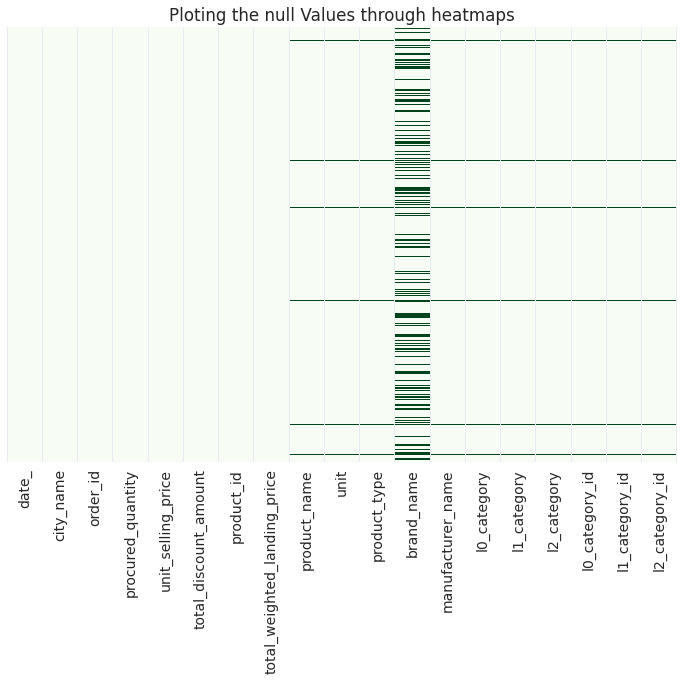

In [ ]:
sns.heatmap(merged_df.isna(), yticklabels=False, cbar=False, cmap="Greens" )
plt.title("Ploting the null Values through heatmaps")

In [ ]:
df=merged_df.dropna(subset=['manufacturer_name','product_type','l1_category_id','l0_category_id','l2_category',"l1_category",                   
                          "l0_category","l2_category_id" ,"unit","product_name",'total_weighted_landing_price']).copy()

In [ ]:
df['brand_name']=df['brand_name'].fillna(value='unknown')

In [ ]:
df.isnull().sum()

date_                           0
city_name                       0
order_id                        0
procured_quantity               0
unit_selling_price              0
total_discount_amount           0
product_id                      0
total_weighted_landing_price    0
product_name                    0
unit                            0
product_type                    0
brand_name                      0
manufacturer_name               0
l0_category                     0
l1_category                     0
l2_category                     0
l0_category_id                  0
l1_category_id                  0
l2_category_id                  0
dtype: int64

### **Remove duplicates**

In [ ]:
# drop duplicates
final_df=df.drop_duplicates()

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460462 entries, 0 to 467063
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date_                         460462 non-null  datetime64[ns]
 1   city_name                     460462 non-null  object        
 2   order_id                      460462 non-null  int32         
 3   procured_quantity             460462 non-null  int8          
 4   unit_selling_price            460462 non-null  float16       
 5   total_discount_amount         460462 non-null  float16       
 6   product_id                    460462 non-null  int32         
 7   total_weighted_landing_price  460462 non-null  float32       
 8   product_name                  460462 non-null  object        
 9   unit                          460462 non-null  object        
 10  product_type                  460462 non-null  object        
 11  brand_name   

### **Downcasting**

In [ ]:
final_df['l0_category_id']=pd.to_numeric(final_df.l0_category_id, downcast='integer')
final_df['l1_category_id']=pd.to_numeric(final_df.l1_category_id, downcast='integer')
final_df['l2_category_id']=pd.to_numeric(final_df.l2_category_id, downcast='integer')

In [ ]:
final_df['unit_selling_price'] = final_df['unit_selling_price'].astype('float64')
final_df['total_discount_amount'] = final_df['unit_selling_price'].astype('float64')

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460462 entries, 0 to 467063
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date_                         460462 non-null  datetime64[ns]
 1   city_name                     460462 non-null  object        
 2   order_id                      460462 non-null  int32         
 3   procured_quantity             460462 non-null  int8          
 4   unit_selling_price            460462 non-null  float64       
 5   total_discount_amount         460462 non-null  float64       
 6   product_id                    460462 non-null  int32         
 7   total_weighted_landing_price  460462 non-null  float32       
 8   product_name                  460462 non-null  object        
 9   unit                          460462 non-null  object        
 10  product_type                  460462 non-null  object        
 11  brand_name   

## **Exploratory data analysis**

We are now ready to dive into exploratory data analysis.

#### **Defining helper functions to get following inforamtions**

In [ ]:
def create_date_features(df):
  df['Month_name'] = df.date_.dt.month_name()
  df['Day'] = df.date_.dt.day_name()
  return df

In [ ]:
def create_sales_feature(df):
  df['Sales']= (df['procured_quantity'] * df['unit_selling_price']) - df['total_discount_amount']
  return df

In [ ]:
def plot_correaltion(df):
  corr_matrix=df.corr()
  plt.figure(1, figsize=(12,7))
  plt.title("Corelations")
  return sns.heatmap(corr_matrix, cmap='BrBG', center=0, annot=True,  cbar=False);

In [ ]:
def add_features(df):
  df = create_date_features(df)
  df = create_sales_feature(df)
  return df

In [ ]:
#Create features
final_df = add_features(final_df)

#### **Check for the corellation between the columns using heatmaps**

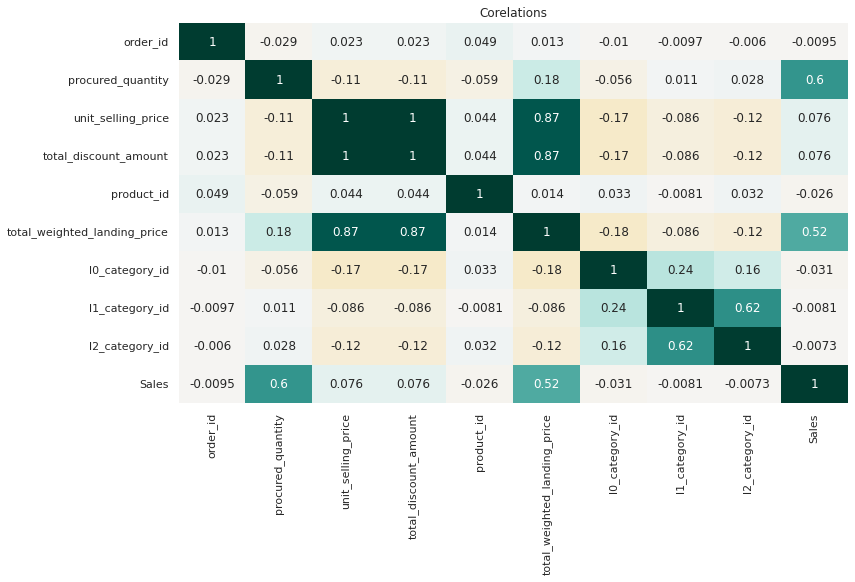

In [ ]:
plot_correaltion(final_df)

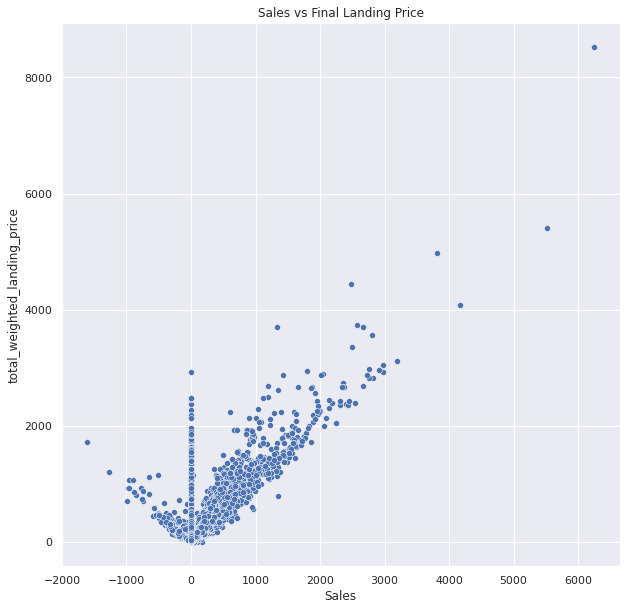

In [ ]:
sns.scatterplot(data=final_df, x='Sales', y='total_weighted_landing_price').set(title='Sales vs Final Landing Price');

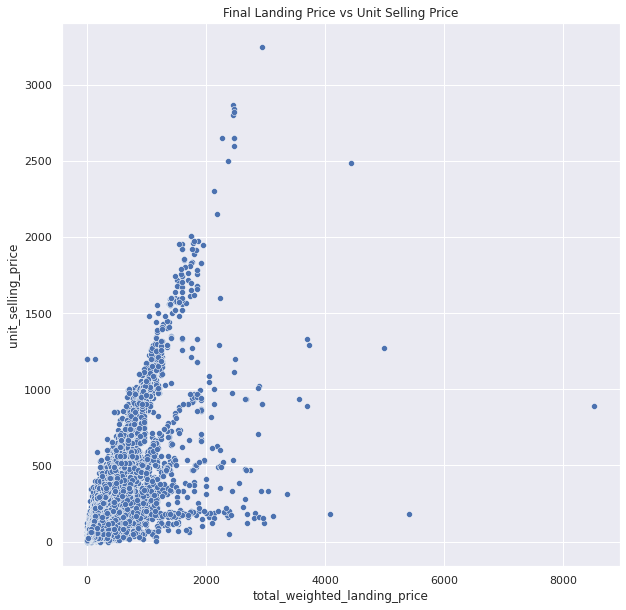

In [ ]:
sns.scatterplot(data=final_df, x='total_weighted_landing_price', y='unit_selling_price').set(title='Final Landing Price vs Unit Selling Price');

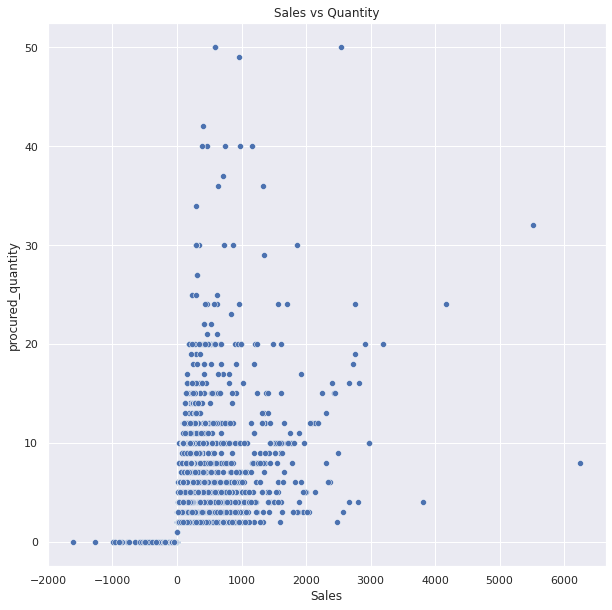

In [ ]:
sns.scatterplot(data=final_df, x='Sales',y='procured_quantity').set(title='Sales vs Quantity');

In [ ]:
print('Number of Companies selling their Products :',final_df.manufacturer_name.nunique())
print('NUmber of Brand sold on flipkart:',final_df.brand_name.nunique())
print('Starting Date:',final_df.date_.min())
print('Ending Date:',final_df.date_.max())
print('Total Products:',final_df.product_type.nunique())
print('Cities flipkart is operating:', final_df.city_name.unique())

Number of Companies selling their Products : 622
NUmber of Brand sold on flipkart: 1112
Starting Date: 2022-04-01 00:00:00
Ending Date: 2022-07-10 00:00:00
Total Products: 1533
Cities flipkart is operating: ['Delhi' 'Bengaluru' 'Mumbai' 'HR-NCR']


#### **Summary Statistics and Sample Data**

In [ ]:
final_df.describe()

,order_id,procured_quantity,unit_selling_price,total_discount_amount,product_id,total_weighted_landing_price,l0_category_id,l1_category_id,l2_category_id,Sales
count,4.604620e+05,460462.000000,460462.000000,460462.000000,460462.000000,460462.000000,460462.000000,460462.000000,460462.000000,460462.000000
mean,1.238226e+08,1.291436,87.193894,87.193894,231451.327358,89.160728,751.218168,983.497544,906.789624,14.113534
std,7.662792e+06,0.919409,110.247832,110.247832,188024.616544,127.374527,676.338947,480.438305,603.338005,63.818757
min,1.122390e+08,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,19.000000,6.000000,-1611.000000
25%,1.172343e+08,1.000000,26.000000,26.000000,19512.000000,25.000000,15.000000,917.000000,166.000000,0.000000
50%,1.223287e+08,1.000000,50.000000,50.000000,263545.000000,48.754889,888.000000,962.000000,1094.000000,0.000000
75%,1.301634e+08,1.000000,102.000000,102.000000,404983.000000,101.998001,1487.000000,1489.000000,1489.000000,0.000000
max,1.377900e+08,50.000000,3244.000000,3244.000000,488711.000000,8518.507812,1557.000000,1992.000000,1999.000000,6251.000000


In [ ]:
final_df.sample(5)

,date_,city_name,order_id,procured_quantity,unit_selling_price,total_discount_amount,product_id,total_weighted_landing_price,product_name,unit,...,manufacturer_name,l0_category,l1_category,l2_category,l0_category_id,l1_category_id,l2_category_id,Month_name,Day,Sales
181049,2022-06-10,Mumbai,129494786,1,38.0,38.0,9098,23.000000,Black Brinjal,500 g - 700 g,...,HOT,Vegetables & Fruits,Fresh Vegetables,Fresh Vegetables,1487,1489,1489,June,Friday,0.0
354946,2022-06-14,Delhi,130713438,2,54.0,54.0,448588,104.312027,Cadbury Dairy Milk Crispello Chocolate Bar - P...,2 x 35 g,...,Mondelez India,Sweet Tooth,Chocolates,Wafer Chocolates,9,944,1172,June,Tuesday,54.0
409611,2022-06-17,Bengaluru,131417593,1,23.0,23.0,237680,19.000000,Lady Finger,500 g,...,HOT,Vegetables & Fruits,Fresh Vegetables,Fresh Vegetables,1487,1489,1489,June,Friday,0.0
440889,2022-04-25,Delhi,117656652,1,38.0,38.0,9483,34.398003,Limca Lime 'N' Lemon Soft Drink 750 ml,750 ml,...,Coca Cola India Ltd,Cold Drinks & Juices,Soft Drinks,Cold Drink Bottles,332,1102,23,April,Monday,0.0
428774,2022-06-19,Delhi,131889169,1,30.0,30.0,12872,29.149998,Amul Gold Full Cream Fresh Milk,500 ml,...,GCMMF,Dairy & Breakfast,Milk,Fresh Milk,14,922,1185,June,Sunday,0.0


### **Asking and answering questions!**

#### **Q1. What was the best month for sales?**

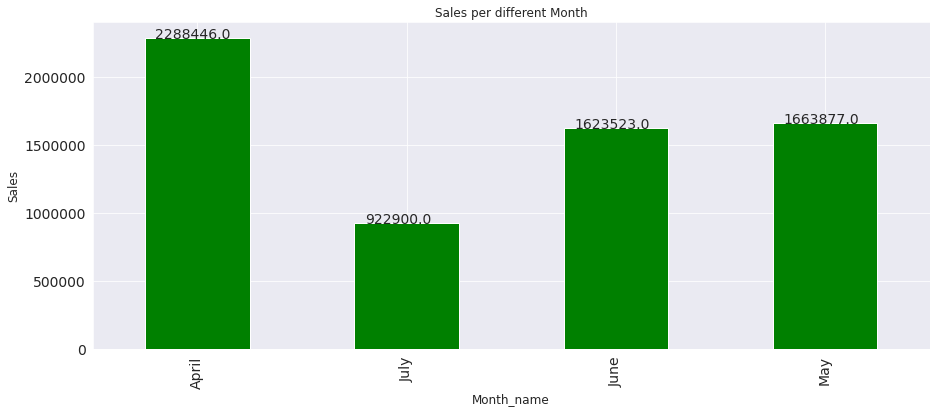

In [ ]:
plt.ticklabel_format(style='plain')  
plt.title('Sales per different Month',fontsize=12)
plt.ylabel('Sales',fontsize=12) 
plt.xlabel('Months',fontsize=12) 
ax=final_df.groupby('Month_name')['Sales'].sum().plot(kind='bar',figsize=(15,6),color='green')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+1.5),fontsize=14)
 
plt.show()

`Observation :`

Sample: Most number of sales were in the April month. As likely explanation could be that there was more number of events were happening this month from news source.

#### **Q2. What are the sales across different cities?**

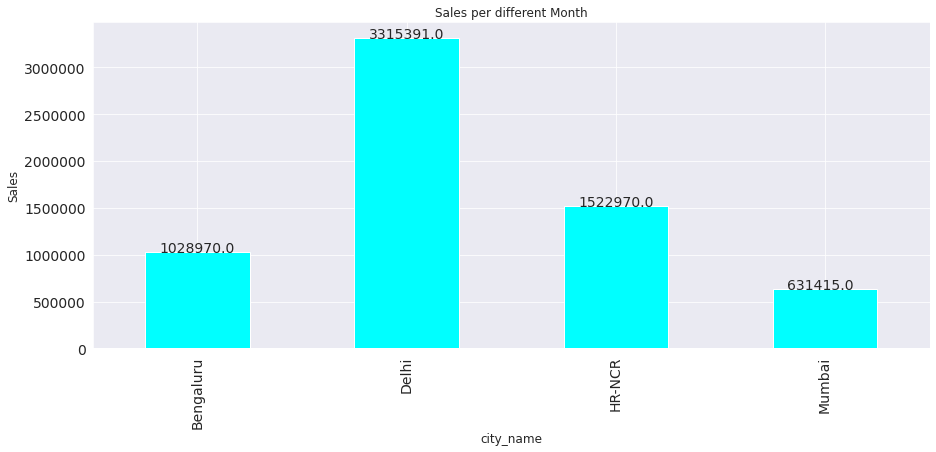

In [ ]:
plt.ticklabel_format(style='plain')  
plt.title('Sales per different Month',fontsize=12)
plt.ylabel('Sales',fontsize=12) 
plt.xlabel('Cities',fontsize=12) 
ax=final_df.groupby('city_name')['Sales'].sum().plot(kind='bar',figsize=(15,6),color='cyan')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.07, p.get_height()+3.5),fontsize=14)
 
plt.show()

**`Insights`**:  
The platform is more used by working professionals as they have less time in spending time for shopping.

Sample:- May be we can use discount coupen for other different cites to increase the sales.

Complete data: 

- Bengaluru is in the top position with the highest number of jobs and employment created, with a 17.6 per cent proportion in 2021-22. Delhi is in the second spot with an 11.5 per cent proportion, followed by Mumbai at 10.4 per cent. Haryana being least compared to other 3 cities.



In [ ]:
city_list=final_df.city_name.unique()
print(city_list)

city_names=['Delhi', 'Bengaluru', 'Mumbai','Haryana']

from geopy.geocoders import Nominatim
def location(lst):
  geolocator = Nominatim(user_agent="my_user_agent")
  country ="India"
  for city in lst:
    loc = geolocator.geocode(city+','+ country)
    print("latitude is :-" ,loc.latitude,"\nlongtitude is:-" ,loc.longitude)

location(city_names)

['Delhi' 'Bengaluru' 'Mumbai' 'HR-NCR']
latitude is :- 28.6517178 
longtitude is:- 77.2219388
latitude is :- 12.9767936 
longtitude is:- 77.590082
latitude is :- 19.0785451 
longtitude is:- 72.878176
latitude is :- 29.0 
longtitude is:- 76.0


In [ ]:
m = folium.Map(location=[12.9767936 , 77.590082], zoom_start=4)
tooltip = "Click me!"
folium.Marker(
    location=[12.9767936, 77.590082],
    popup="City:-Bengaluru , Sales:- 1,04,41,456 Rs.",
    icon=folium.Icon(icon="cloud"),
).add_to(m)

folium.Marker(
     location=[28.6517178, 77.2219388],
    popup="City:- Delhi , Sales:- 3,14,21,958 Rs.",
    icon=folium.Icon(icon="cloud"),
).add_to(m)

folium.Marker(
     location=[19.0785451,72.878176],
    popup="City:-Mumbai , Sales:- 1,47,83,282 Rs.",
    icon=folium.Icon(icon="cloud"),
).add_to(m)
   
folium.Marker(
     location=[29.0,76.0],
    popup="City:-HR-NRC , Sales:- 63,24,417Rs.",
    icon=folium.Icon(icon="cloud"),
).add_to(m)

m

#### **Q3.Popular top 10 brands in flipkart based on quantities sold?**

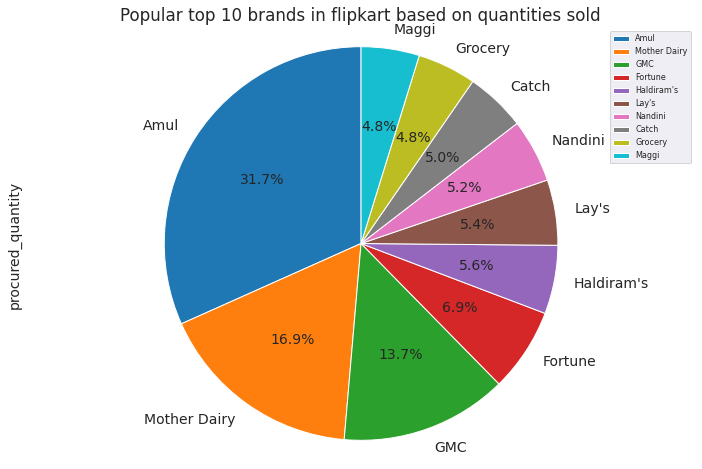

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

top_brand=final_df.groupby('brand_name')['procured_quantity'].sum().sort_values(ascending=False).reset_index()

top_brand = top_brand[top_brand['brand_name'] != 'unknown'].head(10)

top_brand.plot.pie(y='procured_quantity', labels=top_brand['brand_name'], autopct='%1.1f%%',startangle=90)

plt.legend(fontsize=8)
plt.axis('equal')
plt.title('Popular top 10 brands in flipkart based on quantities sold')
plt.show()

`Observations :`

Sample: Amul is the biggest brand **compared** to other prodcucts sold on flipkart

Complete data: 
- Amul            48,439.00
- Mother Dairy    25,899.00
- GMC             20,978.00
- Fortune         10,494.00
- Haldiram's       8,611.00
- Lay's            8,210.00
- Nandini          7,972.00
- Catch            7,567.00
- Grocery          7,381.00

#### **Q4. What products are most often sold together in groups?**

In [ ]:
df=final_df[final_df['order_id'].duplicated(keep=False)]

df['Grouped']=df.groupby('order_id')['product_type'].transform(lambda x: ','.join(x))

df =df[['order_id','Grouped']].drop_duplicates()

df.head()

,order_id,Grouped
2,131233727,"Bitter Gourd,Juice"
4,117422122,"Beans,Paneer"
16,114067998,"Ghee,Ghee"
25,136522427,"Peach,Toilet Cleaner"
45,129051371,"Watermelon,Organic Atta"


In [ ]:
# Refrence: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

count= Counter()

for row in df['Grouped']:
  row_list= row.split(',')
  count.update(Counter(combinations(row_list, 3)))

count.most_common(20)

[(('Dishwash Gel', 'Dishwash Bar', 'Rajma Chitra'), 1),
 (('Sooji', 'Sharbati Atta', 'Organic Urad (Sabut)'), 1),
 (('Sauce', 'Chocolate Bar', 'Choco Pie'), 1),
 (('Rock Salt', 'Jaggery', 'Coriander Powder'), 1),
 (('Shampoo & Conditioner', 'Mishri', 'Kitchen Towel Roll'), 1),
 (('Sulphurless Sugar', 'Green Peas', 'Black Salt'), 1),
 (('White Eggs', 'Beetroot', 'Mint Leaves'), 1),
 (('Raisins', 'Makhana', 'Noodles'), 1),
 (('Raisins', 'Makhana', 'Mustard Oil'), 1),
 (('Raisins', 'Noodles', 'Mustard Oil'), 1),
 (('Makhana', 'Noodles', 'Mustard Oil'), 1),
 (('Tofu', 'Potato Chips', 'Mogra Basmati Rice'), 1),
 (('Chana Dal', 'Tea', 'Chilli Powder'), 1),
 (('Arhar Dal', 'Black Salt', 'Small Mustard Seeds'), 1),
 (('Banana', 'Green Peas', 'Cucumber'), 1),
 (('Peanuts', 'Chana', 'Salt'), 1),
 (('Candle', 'Body Wash', 'Oil Dispenser'), 1),
 (('Potato Chips', 'Potato Chips', 'Pumpkin Seeds'), 1),
 (('Sesame Oil', 'Liquid Detergent', 'Glue Stick'), 1),
 (('Rajma Chitra', 'Sulphurless Sugar', 'N

`Observations :`

Sample: based on the order ID we can see the most products are sold together 

example: 

- Dishwash Gel', 'Dishwash Bar', 'Rajma Chitra 
- Rock Salt', 'Jaggery', 'Coriander Powder' 
- 'Banana', 'Green Peas', 'Cucumber'

#### **Q5. What category of products that got 100% discount? Compare them with different months**

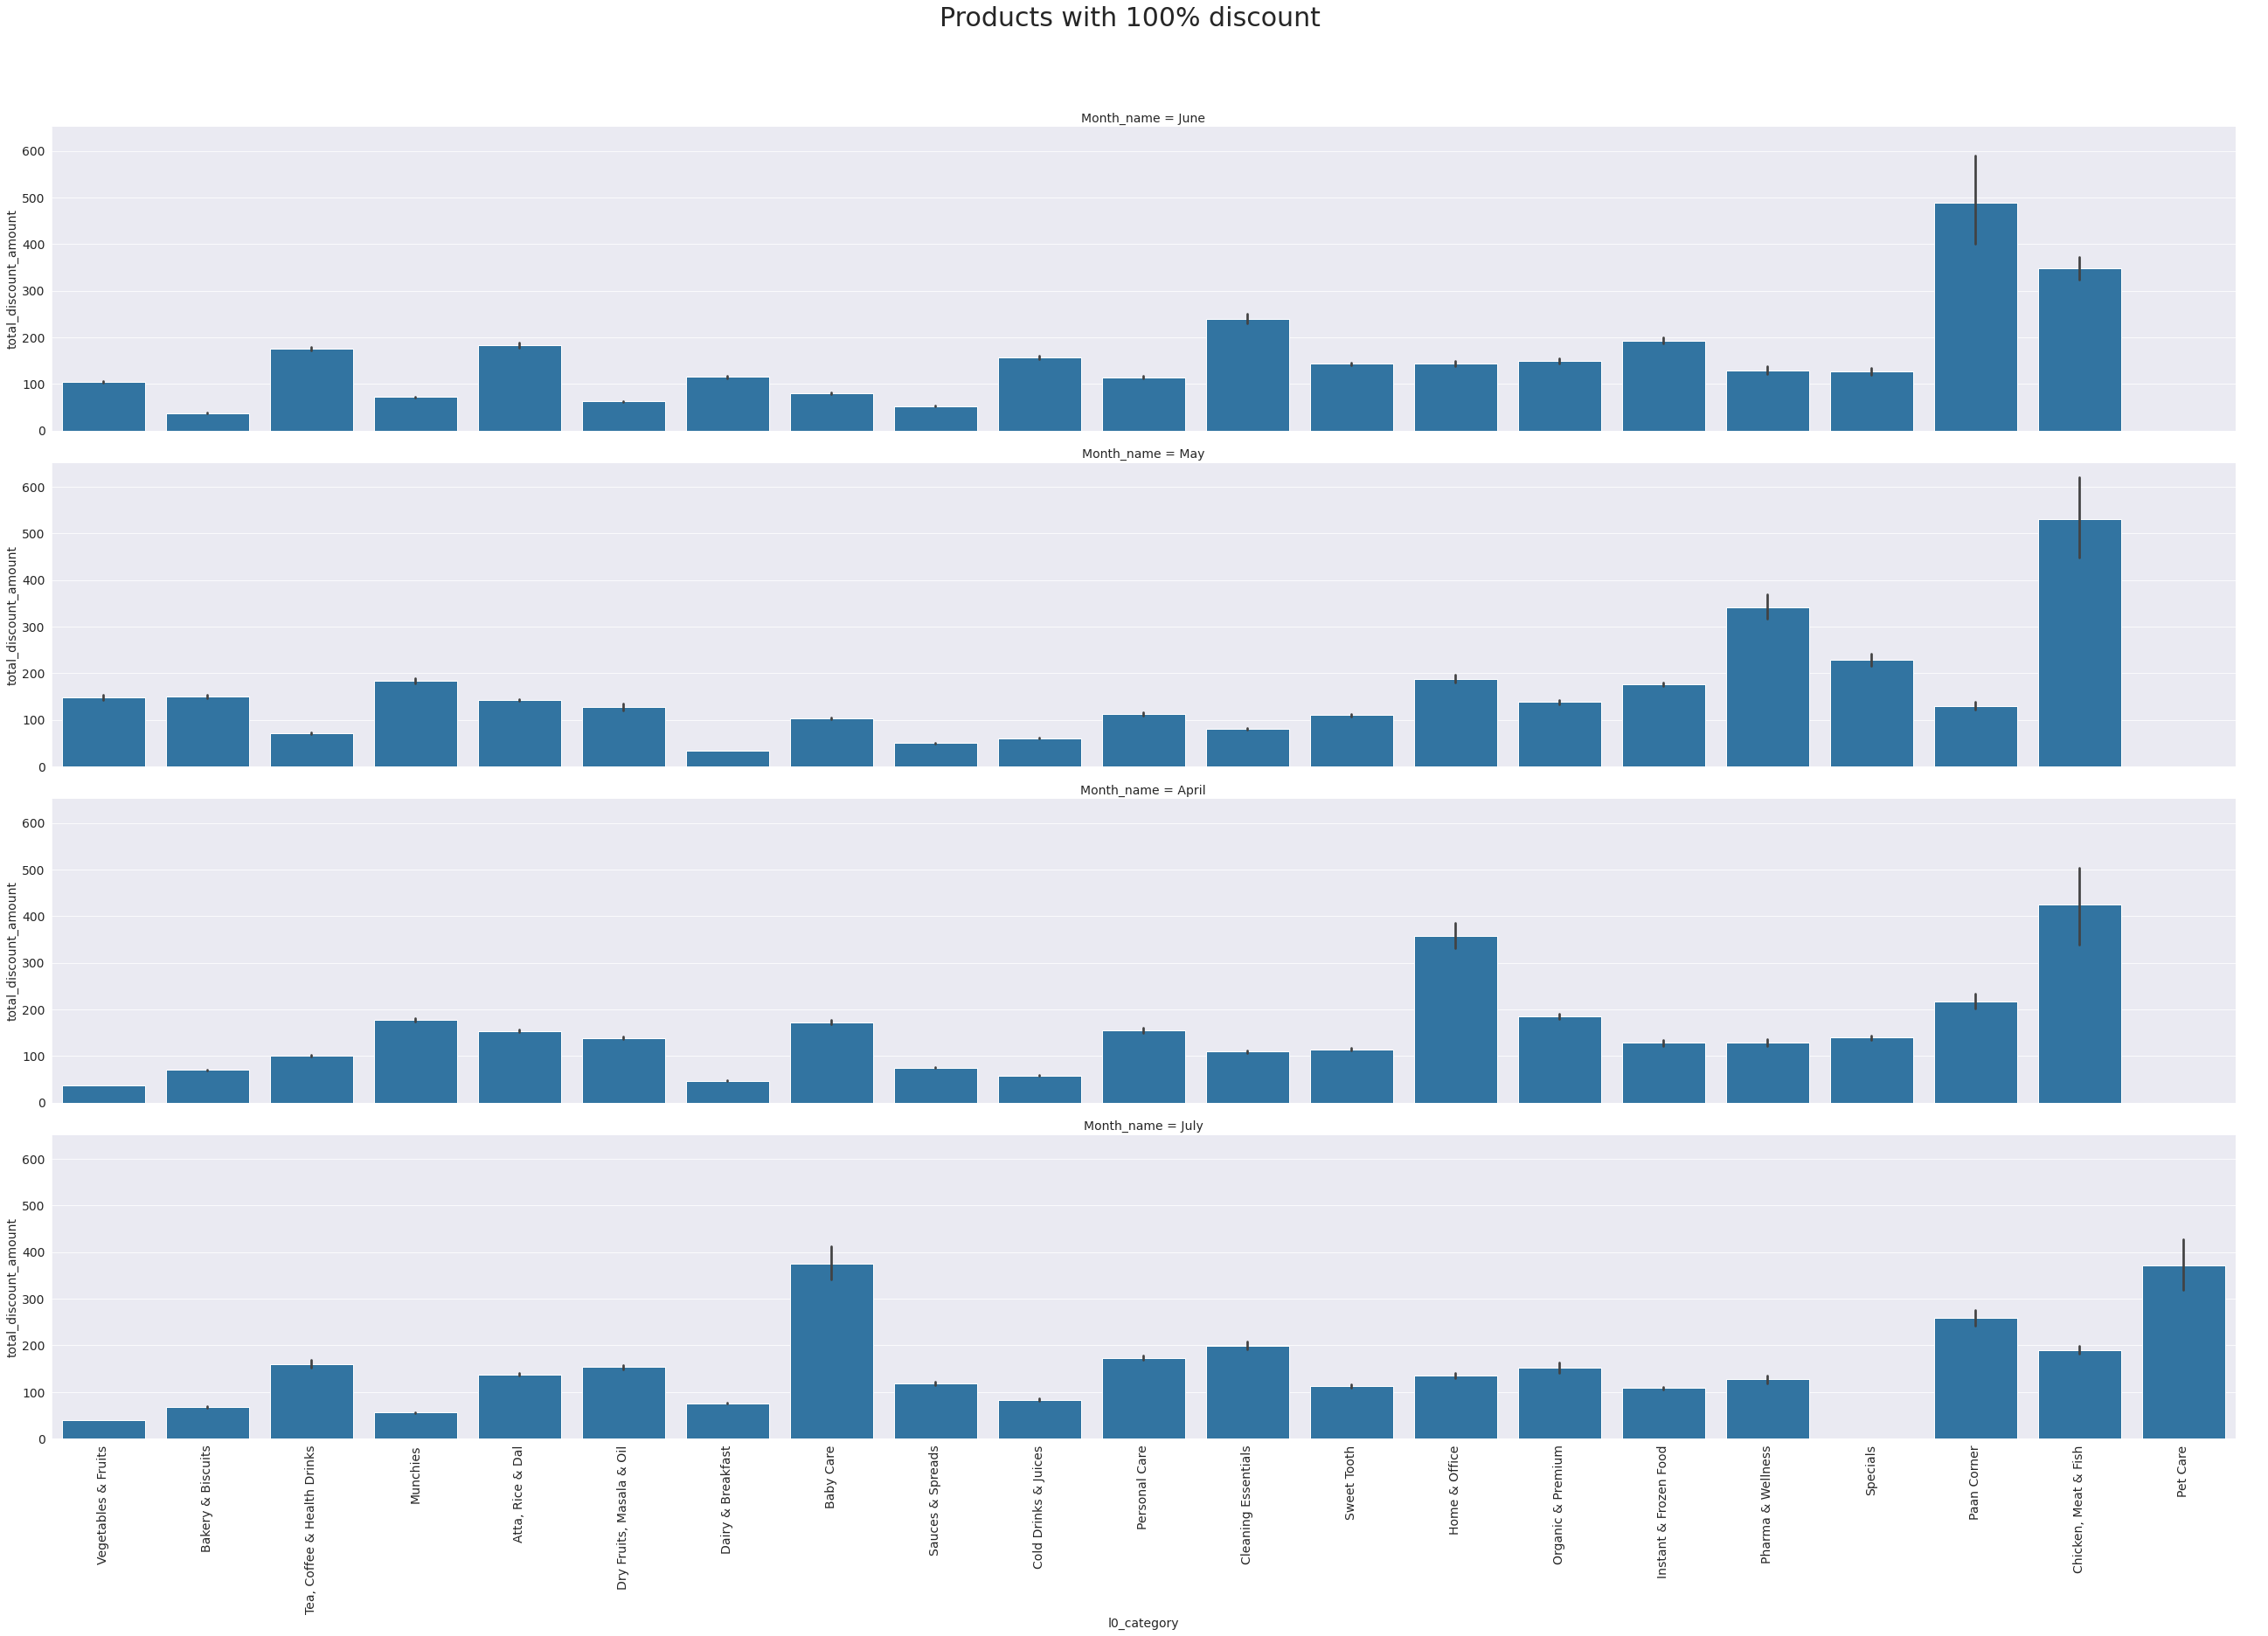

In [ ]:
tda=final_df[final_df['Sales'] == 0].reset_index()

g = sns.FacetGrid(data=tda, row='Month_name',size=6, aspect=6)
g.map_dataframe(sns.barplot,x='l0_category',y='total_discount_amount').add_legend()
g.fig.subplots_adjust(top=0.9) # adjust the Figure in g
g.fig.suptitle('Products with 100% discount',fontsize=30)
for axes in g.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

plt.show()

#### **Q6. What are the top 25 products sold ?**

In [ ]:
product_group=final_df.groupby('product_type').agg({'procured_quantity':'sum'}).reset_index()
data_01=product_group.sort_values('procured_quantity',ascending=False).nlargest(25,'procured_quantity')

fig = px.bar(data_01, y='product_type', x='procured_quantity', text_auto='.2s',
            title="Products sold")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

`Observation`:

The above data tells that the milk and products consumed with it are being sold in bulk and then oil and some green vegetables ordered more . 

#### **Q7. How many companies sell either Vegetables or Fruits or Tea products?**

In [ ]:
search_term1 ='Vegetables & Fruits'
search_result1 = final_df[final_df['l0_category'].str.contains(search_term1)]

search_term2 ='Tea' 
search_result2 = final_df[final_df['l0_category'].str.contains(search_term2)]

vertical_concat = pd.concat([search_result1, search_result2], axis=0)
data_02=vertical_concat.groupby('manufacturer_name')['Sales'].sum().reset_index()


fig = px.pie(data_02, values='Sales', names='manufacturer_name',title="Companies sell either Vegetables or Fruits or Tea products")
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

`Observations :`
There are about 59 companies involed who sells either Vegetables or Fruits or Tea products as these type products are in demand.

#### **Q8. On which day of the week products are more sold on flipkart ?**

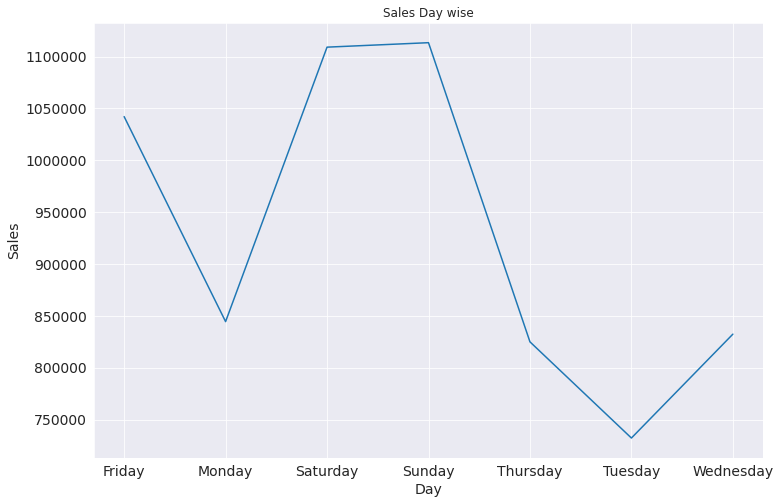

In [ ]:
data_03=final_df.groupby('Day')['Sales'].sum().reset_index()
data_03

import plotly.figure_factory as ff

fig =  ff.create_table(data_03)
fig.show()

plt.ticklabel_format(style='plain')
sns.set(rc={'figure.figsize':(10,10)})
sns.lineplot(data=data_03, x='Day', y='Sales').set(title='Sales Day wise');

`Observation`

Weekends Saturday and Sunday are the most products sold compared to weekdays, as most of the working group are having a holiday 


#### **Q9. Companies that have the largest range of products selling?** 

In [ ]:
data_04=final_df.groupby('manufacturer_name')['product_type'].unique().apply(lambda x: x.size)

op=data_04.nlargest(25).reset_index()

fig = px.bar(op, y='product_type', x='manufacturer_name', text_auto='.2s',
            title="Count of prodcuts sold by the top 25 coampanies")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

`Observations :`
HOT is having a wide range of prodcut list,
HUL & ITC are having similar range of list,
Tata and Sresta Natural Bio products Pvt Ltd are having similar range of list.

## **Summary: Flipkart Sales Analysis** 

We analysed the  Flipkart Sales datset  using Python, Pandas, Matplotlib and Seaborn, Plotly. Here is a summary of the key insights.

Key Metrics:

- Number of Companies selling their Products:- `622`
- Number of Brand sold on flipkart:- `1112`
- Dataset start from the date:- `2022-04-01` and ends on date:- `2022-07-10` 
- Cities flipkart is operating: `Delhi, Bengaluru, Mumbai, HR-NCR`

We also discovered the following insights from our exploratory data analysis.

`Products`:
- Food products such as Fresh Milk','Tomato','Soft Drink','Onion','Curd','Potato','Biscuit','Potato Chips','Milk','Buttermilk','Cucumber','Crisps','Noodles','Paneer','Juice','Lady Finger','Mustard Oil','Coconut','Chilli','Chips','Coriander','Atta','Tea','Banana','Capsicum' are most sold products.

- Count of product type sold by Top 5 companies 
1.	HOT	= 500
2.  Hindustan Unilever Ltd.	= 72
3. 	ITC Limited	= 72
4. 	Mehrotra Consumer Products Pvt. Ltd. = 63
5.	Tata Consumer Products Ltd = 58

`Brands and categories`:
- Amul, Mother Dairy, GMC, Fortune, Haldiram's, Lay's, Nandini these type of brands are being sold on flipkart website.
- Cold Drinks & Juices, Tea, Vegetables anf Fruits, Dairy & Breakfast	Breakfast Cereal, Muesli & Other Cereals , Oils, Cleaning Essentials and many different category are sold on flipkart     

## **Future Work**

`Exploratory data analysis` 
- Further analysis on trends
  - Contribution of price, volume to total sales
  - Identify behaviour patterns within customer segments
- Analyse mutliple data sets over months to identify trends.
- Create and link analysis to dashboards



## References
- Jovian tutorials
  - [Analyzing Tabular Data with Pandas](https://jovian.ai/aakashns/python-pandas-data-analysis)
  - [Data Visualization using Python, Matplotlib and Seaborn](https://jovian.ai/aakashns/python-matplotlib-data-visualization)
  - [Advanced Data Analysis Techniques with Python & Pandas](https://jovian.ai/aakashns/advanced-data-analysis-pandas)
  - [Exploratory Data Analysis Case Study - Stack Overflow Developer Survey](https://jovian.ai/aakashns/stackoverflow-survey-exploratory-data-analysis)
  -  [Interactive Visualization with Plotly](https://jovian.ai/aakashns/interactive-visualization-plotly)

- [Stackoverflow](https://stackoverflow.com/) hacks, links throughout the notebook
- [Geeks for Geeks](https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/#:~:text=Heatmap%20is%20defined%20as%20a,values%2C%20darker%20colors%20are%20preferred)